<a href="https://colab.research.google.com/github/rjkryv/ML/blob/main/DL8_CNN_Code_of_cifr10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
 

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[0]

'airplane'

In [9]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


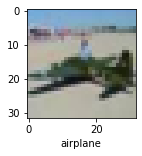

In [10]:
plot_sample(X_train,y_train,8833)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
from tensorflow import keras

In [13]:
ann = keras.Sequential([
                         keras.layers.Flatten(input_shape = (32,32,3)),
                         keras.layers.Dense(3000,activation='relu'),
                         keras.layers.Dense(1000,activation='relu'),
                         keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer= 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train,y_train,epochs =5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8137 - accuracy: 0.3548
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6247 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5432 - accuracy: 0.4568
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4821 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4359 - accuracy: 0.4951


In [14]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5694 - accuracy: 0.4424


[1.5693745613098145, 0.4424000084400177]

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classificaton Report: \n",classification_report(y_test,y_pred_classes))

classificaton Report: 
               precision    recall  f1-score   support

           0       0.48      0.62      0.54      1000
           1       0.34      0.85      0.48      1000
           2       0.51      0.16      0.24      1000
           3       0.32      0.33      0.33      1000
           4       0.42      0.40      0.41      1000
           5       0.40      0.36      0.38      1000
           6       0.68      0.34      0.45      1000
           7       0.52      0.56      0.54      1000
           8       0.76      0.38      0.50      1000
           9       0.46      0.43      0.44      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.43     10000
weighted avg       0.49      0.44      0.43     10000



In [16]:
cnn = models.Sequential([
                         # cnn
                         layers.Conv2D(filters = 32,kernel_size=(3,3),activation= 'relu',input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters = 32,kernel_size=(3,3),activation= 'relu',input_shape = (32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         # dense

                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax')
])

In [20]:
cnn.compile(optimizer= 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [21]:
cnn.fit(X_train,y_train,epochs =10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0446 - accuracy: 0.6345
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9402 - accuracy: 0.6693
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8518 - accuracy: 0.7020
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7719 - accuracy: 0.7288
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7124 - accuracy: 0.7507
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6597 - accuracy: 0.7675
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6100 - accuracy: 0.7848
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8021
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5195 - accuracy: 0.8183
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.480

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0712 - accuracy: 0.6838


[1.0711561441421509, 0.6837999820709229]

In [23]:
y_test= y_test.reshape(-1,)

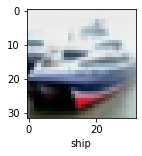

In [24]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.3926257e-03, 7.1403934e-05, 4.3590073e-05, 9.4062126e-01,
        2.4030439e-04, 4.3540116e-02, 1.1837823e-02, 5.9336446e-05,
        8.1723207e-05, 1.1118145e-03],
       [4.1625175e-05, 1.3639085e-03, 4.4709768e-08, 1.4217747e-09,
        2.4802399e-10, 2.6567962e-10, 7.6107853e-12, 1.5113813e-11,
        9.9859422e-01, 2.5956911e-07],
       [3.2928953e-01, 5.6269389e-02, 1.1267252e-02, 6.5738976e-04,
        5.5215915e-04, 1.7848528e-05, 3.5379846e-05, 2.2087323e-04,
        5.8978587e-01, 1.1904246e-02],
       [5.0616485e-01, 1.1299924e-03, 3.1720720e-02, 2.0948277e-04,
        4.2452738e-01, 3.8723574e-06, 2.4336512e-06, 7.3345567e-05,
        3.5867840e-02, 3.0017440e-04],
       [5.0015515e-08, 1.9026822e-07, 1.5626783e-02, 1.6431215e-01,
        2.9911527e-01, 1.5255400e-03, 5.1940680e-01, 3.2632258e-07,
        1.2864117e-05, 1.8306704e-08]], dtype=float32)

In [27]:
np.argmax([5,12,1,35])

3

In [33]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [34]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

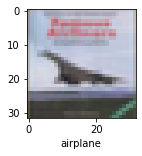

In [40]:
plot_sample(X_test,y_test,3)

In [41]:
classes[y_classes[3]]

'airplane'

In [42]:
print("classificaton Report: \n",classification_report(y_test,y_classes))

classificaton Report: 
               precision    recall  f1-score   support

           0       0.66      0.77      0.71      1000
           1       0.81      0.78      0.79      1000
           2       0.58      0.59      0.58      1000
           3       0.51      0.53      0.52      1000
           4       0.64      0.60      0.62      1000
           5       0.59      0.56      0.57      1000
           6       0.75      0.77      0.76      1000
           7       0.75      0.70      0.72      1000
           8       0.80      0.78      0.79      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

